In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.applications import ResNet50
import cv2
import os

In [43]:
resnet_weights_path = 'E:\\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

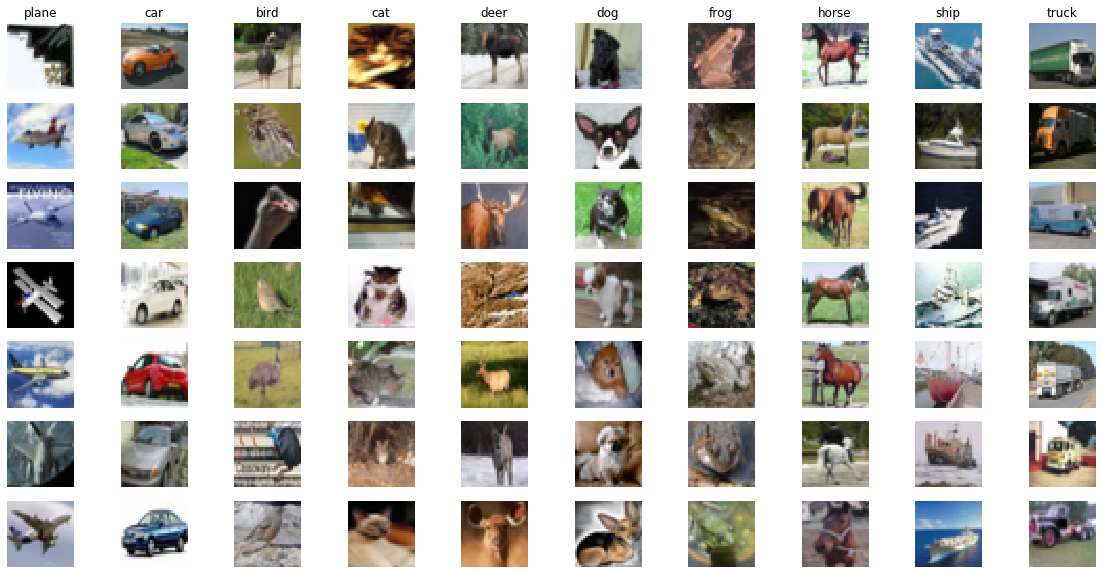

In [44]:
plt.figure(figsize=(20,10))
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i ,idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
#         print(plt_idx)
#     axi.imshow(x_train[idxs[1,1]], cmap='gray_r')

In [45]:
IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

In [46]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [47]:
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

#Building up a Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________

In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [49]:
x_train_scratch = x_train/255.
x_test_scratch =x_test/255.

In [50]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)

In [51]:
model.fit(x_train, y_train, batch_size=32, epochs=10, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)



Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 58s 1ms/step - loss: 2.8830 - acc: 0.8201 - val_loss: 2.8928 - val_acc: 0.8195

Epoch 00001: val_loss improved from inf to 2.89282, saving model to scratchmodel.best.hdf5
Epoch 2/10
40000/40000 [==============================] - 58s 1ms/step - loss: 2.8836 - acc: 0.8201 - val_loss: 2.8928 - val_acc: 0.8195

Epoch 00002: val_loss did not improve from 2.89282
Epoch 3/10
40000/40000 [==============================] - 57s 1ms/step - loss: 2.8836 - acc: 0.8201 - val_loss: 2.8928 - val_acc: 0.8195

Epoch 00003: val_loss did not improve from 2.89282
Epoch 4/10
40000/40000 [==============================] - 56s 1ms/step - loss: 2.8836 - acc: 0.8201 - val_loss: 2.8928 - val_acc: 0.8195

Epoch 00004: val_loss did not improve from 2.89282
Epoch 5/10
40000/40000 [==============================] - 58s 1ms/step - loss: 2.8836 - acc: 0.8201 - val_loss: 2.8928 - val_acc: 0.8195

Epoch 00005: v

In [52]:
score = model.evaluate(x_test, y_test)


10000/10000 [==============================] - 5s 457us/step


In [53]:
print('Accuracy on the Test Images: ', score[1])


Accuracy on the Test Images:  0.8200000577926636


In [54]:
# from keras.applications.resnet50 import ResNet50, preprocess_input
# model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
# from scipy.misc import  imresize
# skimage.transform.resize
# import skimage
# x_train_new = np.array([skimage.transform.resize(x_train[i], (200, 200, 3)) for i in range(0, len(x_train))]).astype('float32')
